In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from importlib import reload
from mppi import InputFiles as I, Calculators as C, Datasets as D

# Analysis of the spin polarization

We perform the analysis of the spin polarization for the neq distribution using the ypp_rt post-processing data.

We consider the various samplings of the k-points

## k = 8x8x8

In [2]:
data_dir = 'rt_k8/FixSymm'
last_time = '240.000'

In [3]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [4]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [5]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

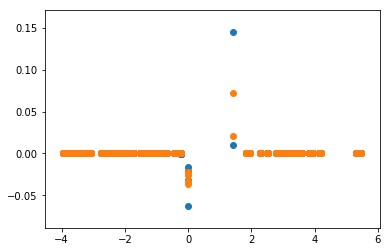

In [6]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)

See how the spin polarization emerges at E=1.418

In [7]:
indexes = []
for ind,e in enumerate(energies):
    if e == 1.418:
        indexes.append(ind)
indexes

[2048, 2049]

In [8]:
up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
(up_bin-dn_bin)/(up_bin+dn_bin)*100

24.933665675002008

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [9]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

2048 1.418


In [10]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

0.15911853276139945 0.09685334029399993 0.25597187305539937 0.255952032000002
spin polarization =  24.32689906028917


We compute the spin polarization for all the frequency range

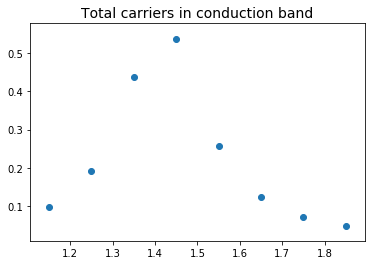

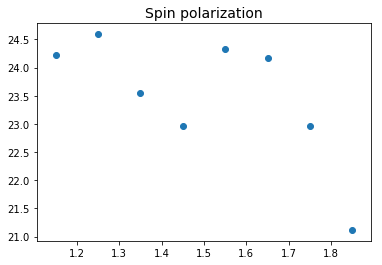

In [11]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 8x8x8 shift

In [12]:
data_dir = 'rt_k8_shift/FixSymm/'
last_time = '240.000'

In [13]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [14]:
f = freq_range[7]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.85


In [15]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

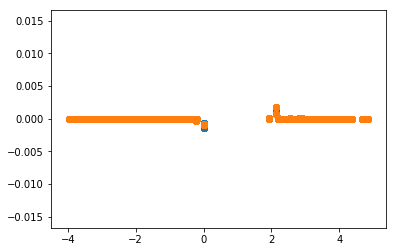

In [16]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [17]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

8192 1.938


In [18]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

0.0309762544000002 0.03253215468000026 0.06350840908000047 0.0635055320000009
spin polarization =  -2.450023220024414


We compute the spin polarization for all the frequency range

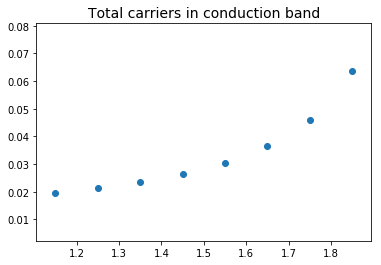

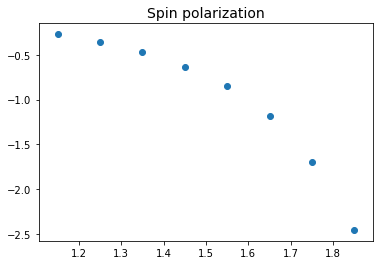

In [19]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 10x10x10 shift

In [20]:
data_dir = 'rt_k10_shift/FixSymm/'
last_time = '240.000'

In [21]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [22]:
f = freq_range[7]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.85


In [23]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

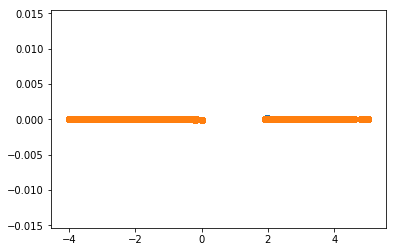

In [24]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,carriers_dn)

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [25]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

16000 1.9


In [26]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

0.0022847337933999557 0.0012508106854000156 0.0035355444787999713 0.0035358767879999993
spin polarization =  29.2409258011719


We compute the spin polarization for all the frequency range

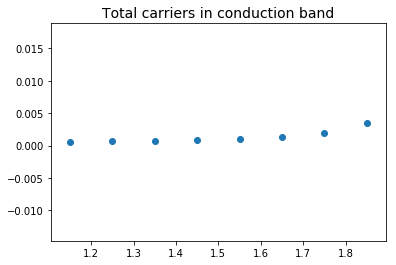

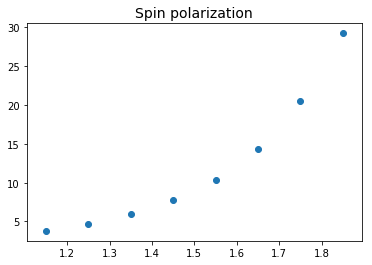

In [27]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

## k = 100 random (k range of 0.1 centred in Gamma)

In [28]:
data_dir = 'rt_k100_random/FixSymm'
last_time = '240.000'

In [29]:
# circular polarization spanning a given frequencies range
freq_range = [1.15,1.25,1.35,1.45,1.55,1.65,1.75,1.85]
# linear polarization for a single frequency
lin_freq = 1.55
# reversed circular polarization for a single frequency
reversed_circ_freq = 1.55

We compute the total number of electrons in the conduction band, for a given frequency, (at the last simulation time) for each spin polarization

In [30]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)

frequency =  1.55


In [31]:
energies = data_tot['E']
carriers_up = data_up[last_time]
carriers_dn = data_dn[last_time]
carriers_tot = data_tot[last_time]

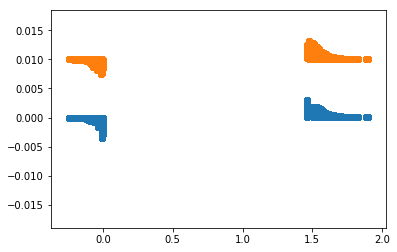

In [32]:
plt.scatter(energies,carriers_up)
plt.scatter(energies,0.01+np.array(carriers_dn))

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [33]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

19200 1.461


See how the spin polarization emerges at E=1.461

In [34]:
indexes = []
for ind,e in enumerate(energies):
    if e == 1.461:
        indexes.append(ind)
len(indexes)

96

In [35]:
up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
(up_bin-dn_bin)/(up_bin+dn_bin)*100

15.688793281207303

A spin polarization of 15.68% at E = 1.461.

The same analysis can be repeated for all the values of energies. We identify the all the (positive) energy levels
removing the degeneracies

In [36]:
cond_energies = energies[cond_thrs:]
cond_energies = sorted(list(set(cond_energies)))

for instance

In [37]:
eng_val = cond_energies[0]

indexes = []
for ind,e in enumerate(energies):
    if e == eng_val:
        indexes.append(ind)
print(len(indexes))
print(indexes)
up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
delta = (up_bin-dn_bin)/(up_bin+dn_bin)*100
print(eng_val,delta)

96
[19200, 19201, 19202, 19203, 19204, 19205, 19206, 19207, 19208, 19209, 19210, 19211, 19212, 19213, 19214, 19215, 19216, 19217, 19218, 19219, 19220, 19221, 19222, 19223, 19224, 19225, 19226, 19227, 19228, 19229, 19230, 19231, 19232, 19233, 19234, 19235, 19236, 19237, 19238, 19239, 19240, 19241, 19242, 19243, 19244, 19245, 19246, 19247, 19248, 19249, 19250, 19251, 19252, 19253, 19254, 19255, 19256, 19257, 19258, 19259, 19260, 19261, 19262, 19263, 19264, 19265, 19266, 19267, 19268, 19269, 19270, 19271, 19272, 19273, 19274, 19275, 19276, 19277, 19278, 19279, 19280, 19281, 19282, 19283, 19284, 19285, 19286, 19287, 19288, 19289, 19290, 19291, 19292, 19293, 19294, 19295]
1.461 15.688793281207303


In [38]:
spin_pol = []
for eng_val in cond_energies:
    indexes = []
    for ind,e in enumerate(energies):
        if e == eng_val:
            indexes.append(ind)
    #print(len(indexes))
    up_bin = sum(carriers_up[slice(indexes[0],indexes[-1]+1)])
    dn_bin = sum(carriers_dn[slice(indexes[0],indexes[-1]+1)])
    spin_pol.append((up_bin-dn_bin)/(up_bin+dn_bin)*100)  


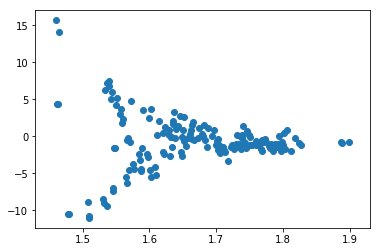

In [39]:
plt.scatter(cond_energies,spin_pol)

The len(indexes) is equal to 48, 96 or 144, why? 

In [ ]:
#######################################################################

The total number of carriers in the conduction band is computed by integrating the carriers for energies > 0

In [130]:
cond_up = sum(carriers_up[cond_thrs:])
cond_dn = sum(carriers_dn[cond_thrs:])
cond_tot = sum(carriers_tot[cond_thrs:])
print(cond_up,cond_dn,cond_up+cond_dn,cond_tot)
delta = (cond_up-cond_dn)/cond_tot*100
print('spin polarization = ',delta)

2.8241443450000103 2.841999352999996 5.666143698000006 5.666101370000002
spin polarization =  -0.31511981226671054


We compute the spin polarization for all the frequency range

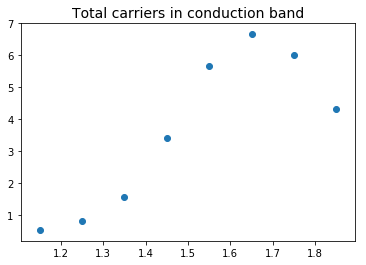

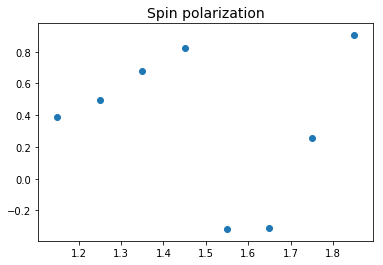

In [131]:
spin_pol = []
total_cond = []
for f in freq_range:
    file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
    file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
    file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
    data_tot = C.dict_parser(file_tot)
    data_up = C.dict_parser(file_up)
    data_dn = C.dict_parser(file_dn)
    energies = data_tot['E']
    carriers_up = data_up[last_time]
    carriers_dn = data_dn[last_time]
    carriers_tot = data_tot[last_time]
    cond_thrs = 0
    for e in energies:
        if e>0:
            cond_thrs = energies.index(e)
            break
    cond_up = sum(carriers_up[cond_thrs:])
    cond_dn = sum(carriers_dn[cond_thrs:])
    cond_tot = sum(carriers_tot[cond_thrs:])
    total_cond.append(cond_tot)
    spin_pol.append((cond_up-cond_dn)/cond_tot*100)
plt.scatter(freq_range,total_cond)
plt.title('Total carriers in conduction band',size = 14)
plt.show()
plt.title('Spin polarization',size = 14)
plt.scatter(freq_range,spin_pol)

Spin polarization resolved in energy

In [17]:
f = freq_range[4]
print('frequency = ',f)
file_tot = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_DATA'%(f,f)
file_up = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_up_DATA'%(f,f)
file_dn = data_dir+'/ypp_freq_%s-pol_circular/o-freq_%s-pol_circular.YPP-RT_occupations_dn_DATA'%(f,f)
data_tot = C.dict_parser(file_tot)
data_up = C.dict_parser(file_up)
data_dn = C.dict_parser(file_dn)
energies = data_tot['E']
carriers_up = np.array(data_up[last_time])
carriers_dn = np.array(data_dn[last_time])
carriers_tot = np.array(data_tot[last_time])

frequency =  1.55


In [42]:
ind = 0
for ep,em,et in zip(data_up['E'],data_dn['E'],data_tot['E']):
    if et >0 :
        print(ind,ep,em,et,ep-em)
        ind+=1

0 1.461 1.461 1.461 0.0
1 1.461 1.461 1.461 0.0
2 1.461 1.461 1.461 0.0
3 1.461 1.461 1.461 0.0
4 1.461 1.461 1.461 0.0
5 1.461 1.461 1.461 0.0
6 1.461 1.461 1.461 0.0
7 1.461 1.461 1.461 0.0
8 1.461 1.461 1.461 0.0
9 1.461 1.461 1.461 0.0
10 1.461 1.461 1.461 0.0
11 1.461 1.461 1.461 0.0
12 1.461 1.461 1.461 0.0
13 1.461 1.461 1.461 0.0
14 1.461 1.461 1.461 0.0
15 1.461 1.461 1.461 0.0
16 1.461 1.461 1.461 0.0
17 1.461 1.461 1.461 0.0
18 1.461 1.461 1.461 0.0
19 1.461 1.461 1.461 0.0
20 1.461 1.461 1.461 0.0
21 1.461 1.461 1.461 0.0
22 1.461 1.461 1.461 0.0
23 1.461 1.461 1.461 0.0
24 1.461 1.461 1.461 0.0
25 1.461 1.461 1.461 0.0
26 1.461 1.461 1.461 0.0
27 1.461 1.461 1.461 0.0
28 1.461 1.461 1.461 0.0
29 1.461 1.461 1.461 0.0
30 1.461 1.461 1.461 0.0
31 1.461 1.461 1.461 0.0
32 1.461 1.461 1.461 0.0
33 1.461 1.461 1.461 0.0
34 1.461 1.461 1.461 0.0
35 1.461 1.461 1.461 0.0
36 1.461 1.461 1.461 0.0
37 1.461 1.461 1.461 0.0
38 1.461 1.461 1.461 0.0
39 1.461 1.461 1.461 0.0
40 1.461 1

426 1.508 1.508 1.508 0.0
427 1.508 1.508 1.508 0.0
428 1.508 1.508 1.508 0.0
429 1.508 1.508 1.508 0.0
430 1.508 1.508 1.508 0.0
431 1.508 1.508 1.508 0.0
432 1.508 1.508 1.508 0.0
433 1.508 1.508 1.508 0.0
434 1.508 1.508 1.508 0.0
435 1.508 1.508 1.508 0.0
436 1.508 1.508 1.508 0.0
437 1.508 1.508 1.508 0.0
438 1.508 1.508 1.508 0.0
439 1.508 1.508 1.508 0.0
440 1.508 1.508 1.508 0.0
441 1.508 1.508 1.508 0.0
442 1.508 1.508 1.508 0.0
443 1.508 1.508 1.508 0.0
444 1.508 1.508 1.508 0.0
445 1.508 1.508 1.508 0.0
446 1.508 1.508 1.508 0.0
447 1.508 1.508 1.508 0.0
448 1.508 1.508 1.508 0.0
449 1.508 1.508 1.508 0.0
450 1.508 1.508 1.508 0.0
451 1.508 1.508 1.508 0.0
452 1.508 1.508 1.508 0.0
453 1.508 1.508 1.508 0.0
454 1.508 1.508 1.508 0.0
455 1.508 1.508 1.508 0.0
456 1.508 1.508 1.508 0.0
457 1.508 1.508 1.508 0.0
458 1.508 1.508 1.508 0.0
459 1.508 1.508 1.508 0.0
460 1.508 1.508 1.508 0.0
461 1.508 1.508 1.508 0.0
462 1.508 1.508 1.508 0.0
463 1.508 1.508 1.508 0.0
464 1.508 1.

922 1.54 1.54 1.54 0.0
923 1.54 1.54 1.54 0.0
924 1.54 1.54 1.54 0.0
925 1.54 1.54 1.54 0.0
926 1.54 1.54 1.54 0.0
927 1.54 1.54 1.54 0.0
928 1.54 1.54 1.54 0.0
929 1.54 1.54 1.54 0.0
930 1.54 1.54 1.54 0.0
931 1.54 1.54 1.54 0.0
932 1.54 1.54 1.54 0.0
933 1.54 1.54 1.54 0.0
934 1.54 1.54 1.54 0.0
935 1.54 1.54 1.54 0.0
936 1.54 1.54 1.54 0.0
937 1.54 1.54 1.54 0.0
938 1.54 1.54 1.54 0.0
939 1.54 1.54 1.54 0.0
940 1.54 1.54 1.54 0.0
941 1.54 1.54 1.54 0.0
942 1.54 1.54 1.54 0.0
943 1.54 1.54 1.54 0.0
944 1.54 1.54 1.54 0.0
945 1.54 1.54 1.54 0.0
946 1.54 1.54 1.54 0.0
947 1.54 1.54 1.54 0.0
948 1.54 1.54 1.54 0.0
949 1.54 1.54 1.54 0.0
950 1.54 1.54 1.54 0.0
951 1.54 1.54 1.54 0.0
952 1.54 1.54 1.54 0.0
953 1.54 1.54 1.54 0.0
954 1.54 1.54 1.54 0.0
955 1.54 1.54 1.54 0.0
956 1.54 1.54 1.54 0.0
957 1.54 1.54 1.54 0.0
958 1.54 1.54 1.54 0.0
959 1.54 1.54 1.54 0.0
960 1.543 1.543 1.543 0.0
961 1.543 1.543 1.543 0.0
962 1.543 1.543 1.543 0.0
963 1.543 1.543 1.543 0.0
964 1.543 1.543 1.543 

1465 1.559 1.559 1.559 0.0
1466 1.559 1.559 1.559 0.0
1467 1.559 1.559 1.559 0.0
1468 1.559 1.559 1.559 0.0
1469 1.559 1.559 1.559 0.0
1470 1.559 1.559 1.559 0.0
1471 1.559 1.559 1.559 0.0
1472 1.559 1.559 1.559 0.0
1473 1.559 1.559 1.559 0.0
1474 1.559 1.559 1.559 0.0
1475 1.559 1.559 1.559 0.0
1476 1.559 1.559 1.559 0.0
1477 1.559 1.559 1.559 0.0
1478 1.559 1.559 1.559 0.0
1479 1.559 1.559 1.559 0.0
1480 1.559 1.559 1.559 0.0
1481 1.559 1.559 1.559 0.0
1482 1.559 1.559 1.559 0.0
1483 1.559 1.559 1.559 0.0
1484 1.559 1.559 1.559 0.0
1485 1.559 1.559 1.559 0.0
1486 1.559 1.559 1.559 0.0
1487 1.559 1.559 1.559 0.0
1488 1.56 1.56 1.56 0.0
1489 1.56 1.56 1.56 0.0
1490 1.56 1.56 1.56 0.0
1491 1.56 1.56 1.56 0.0
1492 1.56 1.56 1.56 0.0
1493 1.56 1.56 1.56 0.0
1494 1.56 1.56 1.56 0.0
1495 1.56 1.56 1.56 0.0
1496 1.56 1.56 1.56 0.0
1497 1.56 1.56 1.56 0.0
1498 1.56 1.56 1.56 0.0
1499 1.56 1.56 1.56 0.0
1500 1.56 1.56 1.56 0.0
1501 1.56 1.56 1.56 0.0
1502 1.56 1.56 1.56 0.0
1503 1.56 1.56 1.56

2112 1.586 1.586 1.586 0.0
2113 1.586 1.586 1.586 0.0
2114 1.586 1.586 1.586 0.0
2115 1.586 1.586 1.586 0.0
2116 1.586 1.586 1.586 0.0
2117 1.586 1.586 1.586 0.0
2118 1.586 1.586 1.586 0.0
2119 1.586 1.586 1.586 0.0
2120 1.586 1.586 1.586 0.0
2121 1.586 1.586 1.586 0.0
2122 1.586 1.586 1.586 0.0
2123 1.586 1.586 1.586 0.0
2124 1.586 1.586 1.586 0.0
2125 1.586 1.586 1.586 0.0
2126 1.586 1.586 1.586 0.0
2127 1.586 1.586 1.586 0.0
2128 1.586 1.586 1.586 0.0
2129 1.586 1.586 1.586 0.0
2130 1.586 1.586 1.586 0.0
2131 1.586 1.586 1.586 0.0
2132 1.586 1.586 1.586 0.0
2133 1.586 1.586 1.586 0.0
2134 1.586 1.586 1.586 0.0
2135 1.586 1.586 1.586 0.0
2136 1.586 1.586 1.586 0.0
2137 1.586 1.586 1.586 0.0
2138 1.586 1.586 1.586 0.0
2139 1.586 1.586 1.586 0.0
2140 1.586 1.586 1.586 0.0
2141 1.586 1.586 1.586 0.0
2142 1.586 1.586 1.586 0.0
2143 1.586 1.586 1.586 0.0
2144 1.586 1.586 1.586 0.0
2145 1.586 1.586 1.586 0.0
2146 1.586 1.586 1.586 0.0
2147 1.586 1.586 1.586 0.0
2148 1.586 1.586 1.586 0.0
2

2776 1.61 1.61 1.61 0.0
2777 1.61 1.61 1.61 0.0
2778 1.61 1.61 1.61 0.0
2779 1.61 1.61 1.61 0.0
2780 1.61 1.61 1.61 0.0
2781 1.61 1.61 1.61 0.0
2782 1.61 1.61 1.61 0.0
2783 1.61 1.61 1.61 0.0
2784 1.611 1.611 1.611 0.0
2785 1.611 1.611 1.611 0.0
2786 1.611 1.611 1.611 0.0
2787 1.611 1.611 1.611 0.0
2788 1.611 1.611 1.611 0.0
2789 1.611 1.611 1.611 0.0
2790 1.611 1.611 1.611 0.0
2791 1.611 1.611 1.611 0.0
2792 1.611 1.611 1.611 0.0
2793 1.611 1.611 1.611 0.0
2794 1.611 1.611 1.611 0.0
2795 1.611 1.611 1.611 0.0
2796 1.611 1.611 1.611 0.0
2797 1.611 1.611 1.611 0.0
2798 1.611 1.611 1.611 0.0
2799 1.611 1.611 1.611 0.0
2800 1.611 1.611 1.611 0.0
2801 1.611 1.611 1.611 0.0
2802 1.611 1.611 1.611 0.0
2803 1.611 1.611 1.611 0.0
2804 1.611 1.611 1.611 0.0
2805 1.611 1.611 1.611 0.0
2806 1.611 1.611 1.611 0.0
2807 1.611 1.611 1.611 0.0
2808 1.611 1.611 1.611 0.0
2809 1.611 1.611 1.611 0.0
2810 1.611 1.611 1.611 0.0
2811 1.611 1.611 1.611 0.0
2812 1.611 1.611 1.611 0.0
2813 1.611 1.611 1.611 0.

3469 1.636 1.636 1.636 0.0
3470 1.636 1.636 1.636 0.0
3471 1.636 1.636 1.636 0.0
3472 1.636 1.636 1.636 0.0
3473 1.636 1.636 1.636 0.0
3474 1.636 1.636 1.636 0.0
3475 1.636 1.636 1.636 0.0
3476 1.636 1.636 1.636 0.0
3477 1.636 1.636 1.636 0.0
3478 1.636 1.636 1.636 0.0
3479 1.636 1.636 1.636 0.0
3480 1.636 1.636 1.636 0.0
3481 1.636 1.636 1.636 0.0
3482 1.636 1.636 1.636 0.0
3483 1.636 1.636 1.636 0.0
3484 1.636 1.636 1.636 0.0
3485 1.636 1.636 1.636 0.0
3486 1.636 1.636 1.636 0.0
3487 1.636 1.636 1.636 0.0
3488 1.636 1.636 1.636 0.0
3489 1.636 1.636 1.636 0.0
3490 1.636 1.636 1.636 0.0
3491 1.636 1.636 1.636 0.0
3492 1.636 1.636 1.636 0.0
3493 1.636 1.636 1.636 0.0
3494 1.636 1.636 1.636 0.0
3495 1.636 1.636 1.636 0.0
3496 1.636 1.636 1.636 0.0
3497 1.636 1.636 1.636 0.0
3498 1.636 1.636 1.636 0.0
3499 1.636 1.636 1.636 0.0
3500 1.636 1.636 1.636 0.0
3501 1.636 1.636 1.636 0.0
3502 1.636 1.636 1.636 0.0
3503 1.636 1.636 1.636 0.0
3504 1.637 1.637 1.637 0.0
3505 1.637 1.637 1.637 0.0
3

4087 1.651 1.651 1.651 0.0
4088 1.651 1.651 1.651 0.0
4089 1.651 1.651 1.651 0.0
4090 1.651 1.651 1.651 0.0
4091 1.651 1.651 1.651 0.0
4092 1.651 1.651 1.651 0.0
4093 1.651 1.651 1.651 0.0
4094 1.651 1.651 1.651 0.0
4095 1.651 1.651 1.651 0.0
4096 1.651 1.651 1.651 0.0
4097 1.651 1.651 1.651 0.0
4098 1.651 1.651 1.651 0.0
4099 1.651 1.651 1.651 0.0
4100 1.651 1.651 1.651 0.0
4101 1.651 1.651 1.651 0.0
4102 1.651 1.651 1.651 0.0
4103 1.651 1.651 1.651 0.0
4104 1.651 1.651 1.651 0.0
4105 1.651 1.651 1.651 0.0
4106 1.651 1.651 1.651 0.0
4107 1.651 1.651 1.651 0.0
4108 1.651 1.651 1.651 0.0
4109 1.651 1.651 1.651 0.0
4110 1.651 1.651 1.651 0.0
4111 1.651 1.651 1.651 0.0
4112 1.651 1.651 1.651 0.0
4113 1.651 1.651 1.651 0.0
4114 1.651 1.651 1.651 0.0
4115 1.651 1.651 1.651 0.0
4116 1.651 1.651 1.651 0.0
4117 1.651 1.651 1.651 0.0
4118 1.651 1.651 1.651 0.0
4119 1.651 1.651 1.651 0.0
4120 1.651 1.651 1.651 0.0
4121 1.651 1.651 1.651 0.0
4122 1.651 1.651 1.651 0.0
4123 1.651 1.651 1.651 0.0
4

4669 1.664 1.664 1.664 0.0
4670 1.664 1.664 1.664 0.0
4671 1.664 1.664 1.664 0.0
4672 1.664 1.664 1.664 0.0
4673 1.664 1.664 1.664 0.0
4674 1.664 1.664 1.664 0.0
4675 1.664 1.664 1.664 0.0
4676 1.664 1.664 1.664 0.0
4677 1.664 1.664 1.664 0.0
4678 1.664 1.664 1.664 0.0
4679 1.664 1.664 1.664 0.0
4680 1.664 1.664 1.664 0.0
4681 1.664 1.664 1.664 0.0
4682 1.664 1.664 1.664 0.0
4683 1.664 1.664 1.664 0.0
4684 1.664 1.664 1.664 0.0
4685 1.664 1.664 1.664 0.0
4686 1.664 1.664 1.664 0.0
4687 1.664 1.664 1.664 0.0
4688 1.664 1.664 1.664 0.0
4689 1.664 1.664 1.664 0.0
4690 1.664 1.664 1.664 0.0
4691 1.664 1.664 1.664 0.0
4692 1.664 1.664 1.664 0.0
4693 1.664 1.664 1.664 0.0
4694 1.664 1.664 1.664 0.0
4695 1.664 1.664 1.664 0.0
4696 1.664 1.664 1.664 0.0
4697 1.664 1.664 1.664 0.0
4698 1.664 1.664 1.664 0.0
4699 1.664 1.664 1.664 0.0
4700 1.664 1.664 1.664 0.0
4701 1.664 1.664 1.664 0.0
4702 1.664 1.664 1.664 0.0
4703 1.664 1.664 1.664 0.0
4704 1.664 1.664 1.664 0.0
4705 1.664 1.664 1.664 0.0
4

5242 1.681 1.681 1.681 0.0
5243 1.681 1.681 1.681 0.0
5244 1.681 1.681 1.681 0.0
5245 1.681 1.681 1.681 0.0
5246 1.681 1.681 1.681 0.0
5247 1.681 1.681 1.681 0.0
5248 1.681 1.681 1.681 0.0
5249 1.681 1.681 1.681 0.0
5250 1.681 1.681 1.681 0.0
5251 1.681 1.681 1.681 0.0
5252 1.681 1.681 1.681 0.0
5253 1.681 1.681 1.681 0.0
5254 1.681 1.681 1.681 0.0
5255 1.681 1.681 1.681 0.0
5256 1.681 1.681 1.681 0.0
5257 1.681 1.681 1.681 0.0
5258 1.681 1.681 1.681 0.0
5259 1.681 1.681 1.681 0.0
5260 1.681 1.681 1.681 0.0
5261 1.681 1.681 1.681 0.0
5262 1.681 1.681 1.681 0.0
5263 1.681 1.681 1.681 0.0
5264 1.681 1.681 1.681 0.0
5265 1.681 1.681 1.681 0.0
5266 1.681 1.681 1.681 0.0
5267 1.681 1.681 1.681 0.0
5268 1.681 1.681 1.681 0.0
5269 1.681 1.681 1.681 0.0
5270 1.681 1.681 1.681 0.0
5271 1.681 1.681 1.681 0.0
5272 1.681 1.681 1.681 0.0
5273 1.681 1.681 1.681 0.0
5274 1.681 1.681 1.681 0.0
5275 1.681 1.681 1.681 0.0
5276 1.681 1.681 1.681 0.0
5277 1.681 1.681 1.681 0.0
5278 1.681 1.681 1.681 0.0
5

5768 1.704 1.704 1.704 0.0
5769 1.704 1.704 1.704 0.0
5770 1.704 1.704 1.704 0.0
5771 1.704 1.704 1.704 0.0
5772 1.704 1.704 1.704 0.0
5773 1.704 1.704 1.704 0.0
5774 1.704 1.704 1.704 0.0
5775 1.704 1.704 1.704 0.0
5776 1.704 1.704 1.704 0.0
5777 1.704 1.704 1.704 0.0
5778 1.704 1.704 1.704 0.0
5779 1.704 1.704 1.704 0.0
5780 1.704 1.704 1.704 0.0
5781 1.704 1.704 1.704 0.0
5782 1.704 1.704 1.704 0.0
5783 1.704 1.704 1.704 0.0
5784 1.704 1.704 1.704 0.0
5785 1.704 1.704 1.704 0.0
5786 1.704 1.704 1.704 0.0
5787 1.704 1.704 1.704 0.0
5788 1.704 1.704 1.704 0.0
5789 1.704 1.704 1.704 0.0
5790 1.704 1.704 1.704 0.0
5791 1.704 1.704 1.704 0.0
5792 1.704 1.704 1.704 0.0
5793 1.704 1.704 1.704 0.0
5794 1.704 1.704 1.704 0.0
5795 1.704 1.704 1.704 0.0
5796 1.704 1.704 1.704 0.0
5797 1.704 1.704 1.704 0.0
5798 1.704 1.704 1.704 0.0
5799 1.704 1.704 1.704 0.0
5800 1.704 1.704 1.704 0.0
5801 1.704 1.704 1.704 0.0
5802 1.704 1.704 1.704 0.0
5803 1.704 1.704 1.704 0.0
5804 1.704 1.704 1.704 0.0
5

6276 1.726 1.726 1.726 0.0
6277 1.726 1.726 1.726 0.0
6278 1.726 1.726 1.726 0.0
6279 1.726 1.726 1.726 0.0
6280 1.726 1.726 1.726 0.0
6281 1.726 1.726 1.726 0.0
6282 1.726 1.726 1.726 0.0
6283 1.726 1.726 1.726 0.0
6284 1.726 1.726 1.726 0.0
6285 1.726 1.726 1.726 0.0
6286 1.726 1.726 1.726 0.0
6287 1.726 1.726 1.726 0.0
6288 1.729 1.729 1.729 0.0
6289 1.729 1.729 1.729 0.0
6290 1.729 1.729 1.729 0.0
6291 1.729 1.729 1.729 0.0
6292 1.729 1.729 1.729 0.0
6293 1.729 1.729 1.729 0.0
6294 1.729 1.729 1.729 0.0
6295 1.729 1.729 1.729 0.0
6296 1.729 1.729 1.729 0.0
6297 1.729 1.729 1.729 0.0
6298 1.729 1.729 1.729 0.0
6299 1.729 1.729 1.729 0.0
6300 1.729 1.729 1.729 0.0
6301 1.729 1.729 1.729 0.0
6302 1.729 1.729 1.729 0.0
6303 1.729 1.729 1.729 0.0
6304 1.729 1.729 1.729 0.0
6305 1.729 1.729 1.729 0.0
6306 1.729 1.729 1.729 0.0
6307 1.729 1.729 1.729 0.0
6308 1.729 1.729 1.729 0.0
6309 1.729 1.729 1.729 0.0
6310 1.729 1.729 1.729 0.0
6311 1.729 1.729 1.729 0.0
6312 1.729 1.729 1.729 0.0
6

6920 1.739 1.739 1.739 0.0
6921 1.739 1.739 1.739 0.0
6922 1.739 1.739 1.739 0.0
6923 1.739 1.739 1.739 0.0
6924 1.739 1.739 1.739 0.0
6925 1.739 1.739 1.739 0.0
6926 1.739 1.739 1.739 0.0
6927 1.739 1.739 1.739 0.0
6928 1.739 1.739 1.739 0.0
6929 1.739 1.739 1.739 0.0
6930 1.739 1.739 1.739 0.0
6931 1.739 1.739 1.739 0.0
6932 1.739 1.739 1.739 0.0
6933 1.739 1.739 1.739 0.0
6934 1.739 1.739 1.739 0.0
6935 1.739 1.739 1.739 0.0
6936 1.739 1.739 1.739 0.0
6937 1.739 1.739 1.739 0.0
6938 1.739 1.739 1.739 0.0
6939 1.739 1.739 1.739 0.0
6940 1.739 1.739 1.739 0.0
6941 1.739 1.739 1.739 0.0
6942 1.739 1.739 1.739 0.0
6943 1.739 1.739 1.739 0.0
6944 1.739 1.739 1.739 0.0
6945 1.739 1.739 1.739 0.0
6946 1.739 1.739 1.739 0.0
6947 1.739 1.739 1.739 0.0
6948 1.739 1.739 1.739 0.0
6949 1.739 1.739 1.739 0.0
6950 1.739 1.739 1.739 0.0
6951 1.739 1.739 1.739 0.0
6952 1.739 1.739 1.739 0.0
6953 1.739 1.739 1.739 0.0
6954 1.739 1.739 1.739 0.0
6955 1.739 1.739 1.739 0.0
6956 1.739 1.739 1.739 0.0
6

7440 1.751 1.751 1.751 0.0
7441 1.751 1.751 1.751 0.0
7442 1.751 1.751 1.751 0.0
7443 1.751 1.751 1.751 0.0
7444 1.751 1.751 1.751 0.0
7445 1.751 1.751 1.751 0.0
7446 1.751 1.751 1.751 0.0
7447 1.751 1.751 1.751 0.0
7448 1.751 1.751 1.751 0.0
7449 1.751 1.751 1.751 0.0
7450 1.751 1.751 1.751 0.0
7451 1.751 1.751 1.751 0.0
7452 1.751 1.751 1.751 0.0
7453 1.751 1.751 1.751 0.0
7454 1.751 1.751 1.751 0.0
7455 1.751 1.751 1.751 0.0
7456 1.751 1.751 1.751 0.0
7457 1.751 1.751 1.751 0.0
7458 1.751 1.751 1.751 0.0
7459 1.751 1.751 1.751 0.0
7460 1.751 1.751 1.751 0.0
7461 1.751 1.751 1.751 0.0
7462 1.751 1.751 1.751 0.0
7463 1.751 1.751 1.751 0.0
7464 1.751 1.751 1.751 0.0
7465 1.751 1.751 1.751 0.0
7466 1.751 1.751 1.751 0.0
7467 1.751 1.751 1.751 0.0
7468 1.751 1.751 1.751 0.0
7469 1.751 1.751 1.751 0.0
7470 1.751 1.751 1.751 0.0
7471 1.751 1.751 1.751 0.0
7472 1.751 1.751 1.751 0.0
7473 1.751 1.751 1.751 0.0
7474 1.751 1.751 1.751 0.0
7475 1.751 1.751 1.751 0.0
7476 1.751 1.751 1.751 0.0
7

7926 1.767 1.767 1.767 0.0
7927 1.767 1.767 1.767 0.0
7928 1.767 1.767 1.767 0.0
7929 1.767 1.767 1.767 0.0
7930 1.767 1.767 1.767 0.0
7931 1.767 1.767 1.767 0.0
7932 1.767 1.767 1.767 0.0
7933 1.767 1.767 1.767 0.0
7934 1.767 1.767 1.767 0.0
7935 1.767 1.767 1.767 0.0
7936 1.767 1.767 1.767 0.0
7937 1.767 1.767 1.767 0.0
7938 1.767 1.767 1.767 0.0
7939 1.767 1.767 1.767 0.0
7940 1.767 1.767 1.767 0.0
7941 1.767 1.767 1.767 0.0
7942 1.767 1.767 1.767 0.0
7943 1.767 1.767 1.767 0.0
7944 1.767 1.767 1.767 0.0
7945 1.767 1.767 1.767 0.0
7946 1.767 1.767 1.767 0.0
7947 1.767 1.767 1.767 0.0
7948 1.767 1.767 1.767 0.0
7949 1.767 1.767 1.767 0.0
7950 1.767 1.767 1.767 0.0
7951 1.767 1.767 1.767 0.0
7952 1.767 1.767 1.767 0.0
7953 1.767 1.767 1.767 0.0
7954 1.767 1.767 1.767 0.0
7955 1.767 1.767 1.767 0.0
7956 1.767 1.767 1.767 0.0
7957 1.767 1.767 1.767 0.0
7958 1.767 1.767 1.767 0.0
7959 1.767 1.767 1.767 0.0
7960 1.767 1.767 1.767 0.0
7961 1.767 1.767 1.767 0.0
7962 1.767 1.767 1.767 0.0
7

8519 1.787 1.787 1.787 0.0
8520 1.787 1.787 1.787 0.0
8521 1.787 1.787 1.787 0.0
8522 1.787 1.787 1.787 0.0
8523 1.787 1.787 1.787 0.0
8524 1.787 1.787 1.787 0.0
8525 1.787 1.787 1.787 0.0
8526 1.787 1.787 1.787 0.0
8527 1.787 1.787 1.787 0.0
8528 1.787 1.787 1.787 0.0
8529 1.787 1.787 1.787 0.0
8530 1.787 1.787 1.787 0.0
8531 1.787 1.787 1.787 0.0
8532 1.787 1.787 1.787 0.0
8533 1.787 1.787 1.787 0.0
8534 1.787 1.787 1.787 0.0
8535 1.787 1.787 1.787 0.0
8536 1.787 1.787 1.787 0.0
8537 1.787 1.787 1.787 0.0
8538 1.787 1.787 1.787 0.0
8539 1.787 1.787 1.787 0.0
8540 1.787 1.787 1.787 0.0
8541 1.787 1.787 1.787 0.0
8542 1.787 1.787 1.787 0.0
8543 1.787 1.787 1.787 0.0
8544 1.791 1.791 1.791 0.0
8545 1.791 1.791 1.791 0.0
8546 1.791 1.791 1.791 0.0
8547 1.791 1.791 1.791 0.0
8548 1.791 1.791 1.791 0.0
8549 1.791 1.791 1.791 0.0
8550 1.791 1.791 1.791 0.0
8551 1.791 1.791 1.791 0.0
8552 1.791 1.791 1.791 0.0
8553 1.791 1.791 1.791 0.0
8554 1.791 1.791 1.791 0.0
8555 1.791 1.791 1.791 0.0
8

9206 1.818 1.818 1.818 0.0
9207 1.818 1.818 1.818 0.0
9208 1.818 1.818 1.818 0.0
9209 1.818 1.818 1.818 0.0
9210 1.818 1.818 1.818 0.0
9211 1.818 1.818 1.818 0.0
9212 1.818 1.818 1.818 0.0
9213 1.818 1.818 1.818 0.0
9214 1.818 1.818 1.818 0.0
9215 1.818 1.818 1.818 0.0
9216 1.818 1.818 1.818 0.0
9217 1.818 1.818 1.818 0.0
9218 1.818 1.818 1.818 0.0
9219 1.818 1.818 1.818 0.0
9220 1.818 1.818 1.818 0.0
9221 1.818 1.818 1.818 0.0
9222 1.818 1.818 1.818 0.0
9223 1.818 1.818 1.818 0.0
9224 1.818 1.818 1.818 0.0
9225 1.818 1.818 1.818 0.0
9226 1.818 1.818 1.818 0.0
9227 1.818 1.818 1.818 0.0
9228 1.818 1.818 1.818 0.0
9229 1.818 1.818 1.818 0.0
9230 1.818 1.818 1.818 0.0
9231 1.818 1.818 1.818 0.0
9232 1.818 1.818 1.818 0.0
9233 1.818 1.818 1.818 0.0
9234 1.818 1.818 1.818 0.0
9235 1.818 1.818 1.818 0.0
9236 1.818 1.818 1.818 0.0
9237 1.818 1.818 1.818 0.0
9238 1.818 1.818 1.818 0.0
9239 1.818 1.818 1.818 0.0
9240 1.818 1.818 1.818 0.0
9241 1.818 1.818 1.818 0.0
9242 1.818 1.818 1.818 0.0
9

In [46]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

19200 1.461


In [63]:
bin_size = 0.01

In [76]:
energies_thrs = energies[cond_thrs:]
data_up_thrs = carriers_up[cond_thrs:]
data_dn_thrs = carriers_dn[cond_thrs:]

energies_bin = []
data_up_bin = []
data_dn_bin = []
eng_index = 0
#print(len(energie_thrs))
while True:
    bin_dim = 1
    for ind in range(eng_index,len(energies_thrs)-1):
        if np.allclose(energies_thrs[eng_index],energies_thrs[ind],atol=bin_size):
            bin_dim+=1
        else : 
            print('qui')
            eng_index+=bin_dim
            break
    print(bin_dim,eng_index)
    if eng_index == len(energies_thrs)-1 : break
            
    

qui
289 289
qui
96 385
qui
192 577
qui
384 961
qui
384 1345
qui
288 1633
qui
384 2017
qui
384 2401
qui
288 2689
qui
192 2881
qui
288 3169
qui
576 3745
qui
432 4177
qui
576 4753
qui
240 4993
qui
480 5473
qui
336 5809
qui
288 6097
qui
192 6289
qui
720 7009
qui
432 7441
qui
336 7777
qui
384 8161
qui
336 8497
qui
288 8785
qui
336 9121
qui
144 9265
qui
144 9409
qui
96 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 95

95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505
95 9505


KeyboardInterrupt: 

In [79]:
bin_size = 0.1

energies_thrs = energies[cond_thrs:]
data_up_thrs = carriers_up[cond_thrs:]
data_dn_thrs = carriers_dn[cond_thrs:]

energies_bin = []
data_up_bin = []
data_dn_bin = []
eng_index = 0

for ind1 in range(len(energies_thrs)):
    energies_bin.append(energies_thrs[ind1])
    bin_up_sum = 0.
    
    for ind2 in range(ind1,len(energies_thrs)):
        if np.allclose(energies_thrs[ind1],energies_thrs[ind2],atol=bin_size):
            bin_up_sum+=data_up_thrs[ind2]
        else : 
            data_up_bin.append(bin_up_sum)
            break
        if ind2 == len(energies_thrs) -1 : 
            data_up_bin.append(bin_up_sum)
            break

KeyboardInterrupt: 

In [97]:
en =  [1,1,1,1,1,1,1,1,2,2,2,2,2,3,3,3,4]
val = [0,0,0,0,0,0,1,1,2,0,0,0,2,0,0,0,4]

In [98]:
break_points = [0]
for ind in range(1,len(en)):
    if not np.allclose(en[ind],en[ind-1],atol = 1e-2):
        break_points.append(ind)
break_points

[0, 8, 13, 16]

In [99]:
en_bin = []
val_bin = []
for bin in range(len(break_points)-1): 
    en_bin.append(en[bin])
    s = 0.
    for ind in range(break_points[bin],break_points[bin+1]):
        s+=val[ind]
    val_bin.append(s)
    
print(en_bin)
print(val_bin)

[1, 1, 1]
[2.0, 4.0, 0.0]


In [87]:
ind1 = 0
while ind1 < len(en):
    for ind2 in range(ind1+1,len(en)):
        if en[ind2] == en[ind1]:  
            print(ind1,ind2)
        else : 
            ind1 = ind2
            

0 1
0 2
0 3
0 4
0 5
0 6
0 7
8 9
8 10
8 11
8 12
13 14
13 15


KeyboardInterrupt: 

In [57]:
np.allclose(1.461,1.462,atol=1e-4)

False

In [59]:
for i in range(3,6):
    print(i)

3
4
5


In [27]:
cond_thrs = 0
for e in energies:
    if e>0:
        cond_thrs = energies.index(e)
        break
print(cond_thrs,energies[cond_thrs])

19200 1.461


In [31]:
spin_pol = (carriers_up-carriers_dn)/carriers_tot*100

In [34]:
#spin_pol

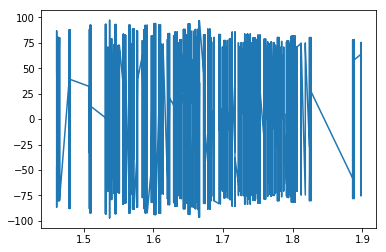

In [35]:
plt.plot(energies[cond_thrs:],spin_pol[cond_thrs:])